<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_07_derivadas.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 7
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por: 


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo [misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.

4. Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.


```python
import numpy as np
from scipy import misc
def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)

```

\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

In [ ]:
import sympy as sp
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

**1. Sympy**

In [ ]:
z = sp.Symbol('z')
k = sp.Symbol('k')
q = sp.Symbol('q')
R = sp.Symbol('R')

v = lambda z: z/sp.sqrt(z**2 + R**2)
E = -sp.diff(v(z),z)*k*q

print(f'Campo eléctrico:\n')
E

Campo eléctrico:



k*q*(z**2/(R**2 + z**2)**(3/2) - 1/sqrt(R**2 + z**2))

**2. Cálculo del campo para z0 = 0.1**

In [ ]:
z0 = 0.1
R = 0.1
k = 1
q = 1

v = lambda z,R: z/np.sqrt(z**2 + R**2)
dv = misc.derivative(v, z0,args = (R,))

E = -dv*k*q
print(f'Campo eléctrico en z0 = 0.1 es {E}\n')
print('------------------------------------')

Campo eléctrico en z0 = 0.1 es -0.9948884705706614

------------------------------------


<ipython-input-80-d8fa50a6f12e>:7: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dv = misc.derivative(v, z0,args = (R,))


**3. Cálculo del campo para un conjunto de números de z y gráfica**

<ipython-input-83-9ecb2a239195>:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dv = misc.derivative(v,z,dx=1e-6,args=(R,))


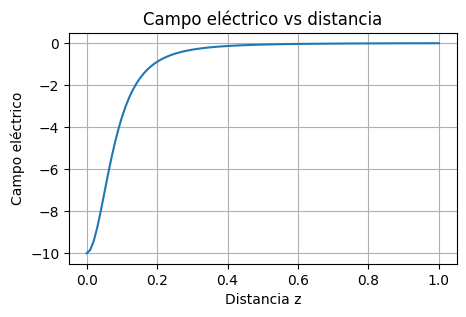

In [ ]:
z = np.linspace(0,1,100)
R = 0.1
v = lambda z,R: z/np.sqrt(z**2 + R**2)
dv = misc.derivative(v,z,dx=1e-6,args=(R,))
campo = -dv*k*q

plt.figure(figsize=(5,3))
plt.title('Campo eléctrico vs distancia')
plt.xlabel('Distancia z')
plt.ylabel('Campo eléctrico')
plt.plot(z,campo)
plt.grid();

In [ ]:
def potencial(z,R,kq=1):
  V = z*kq/np.sqrt(z**2 + R**2)
  return V

<ipython-input-48-4fe5fd539981>:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  E = -misc.derivative(potencial,z,dx=1e-6,args=(R,))


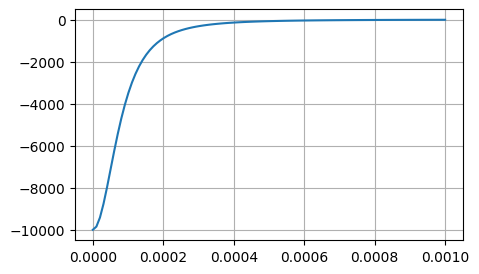

In [ ]:
z = np.linspace(0,0.001,100)
R = 0.1e-3
V = potencial(z,0.1)
E = -misc.derivative(potencial,z,dx=1e-6,args=(R,))

plt.figure(figsize=(5,3))
plt.plot(z,E)
plt.grid()

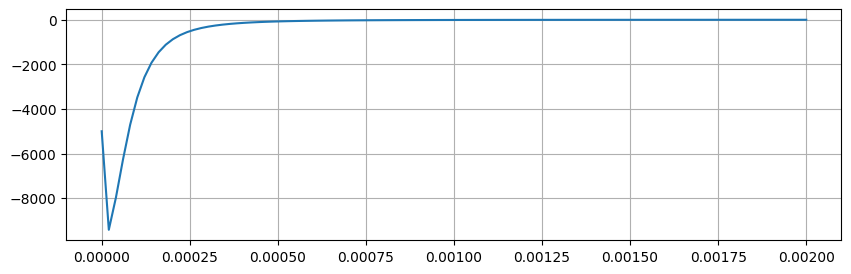

In [ ]:
def potencial(z,R,kq):
  if z >= 0:
    V = z*kq/np.sqrt(z**2 + R**2)
  else:
    V = 0
  return V

z = np.linspace(0,0.002,100)

R = 0.1e-3
kq = 1

derivada_vectorizada = np.vectorize(misc.derivative, excluded = ['args'])
gradiente = derivada_vectorizada(potencial,z,dx=1e-6, args=(R,kq))
campo = -gradiente
plt.figure(figsize=(10,3))
plt.plot(z,campo)
plt.grid()

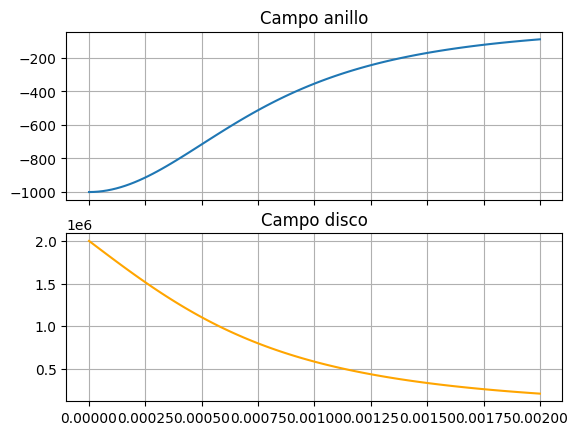

In [ ]:
def potencial(z,R,kq,select):
  if select == 'anillo':
    V = z*kq/np.sqrt(z**2 + R**2)
  elif select == 'disco':
    V = (2*kq/R**2)*(np.sqrt(R**2 + z**2) - z)
  else:
    print('Error mi papá: seleccione disco o anillo')
    V = None
  return V

z = np.linspace(0,0.002,100)
R = 1e-3
kq = 1

derivada_vectorizada = np.vectorize(misc.derivative, excluded = ['args'])

try:
  gradiente = derivada_vectorizada(potencial, z, dx = 1e-6, args=(R, kq,'disco'))
  campo_disco = -gradiente
except:
  print('Error mi papá: seleccione disco o anillo')

try:
  gradiente_anillo = derivada_vectorizada(potencial, z, dx = 1e-6, args=(R, kq,'anillo'))
  campo_anillo = -gradiente_anillo
except:
  print('Error mi papá: seleccione disco o anillo')


try:
  gradiente_disco = derivada_vectorizada(potencial, z, dx = 1e-6, args=(R, kq,'disco'))
  campo_disco = -gradiente_disco
except:
  print('Error mi papá: seleccione disco o anillo')

fig, (ax1,ax2) = plt.subplots(2)

ax1.plot(z, campo_anillo)
ax1.set_title('Campo anillo')
ax1.grid()

ax2.plot(z, campo_disco, color ='orange')
ax2.set_title('Campo disco')
ax2.grid()

for ax in fig.get_axes():
    ax.label_outer()